# **Bernoulli Process Simulator**

## **Contents**
1. [Introduction](#Introduction)
2. [Bernoulli Distribution](#Bernoulli-Distribution)
3. [Binomial Distribution](#Binomial-Distribution)
4. [Bernoulli Process](#Bernoulli-Process)
5. [Credits](#Credits)

## **Introduction**
The purpose of this project is to simulate and visualise *Bernoulli processes* (also known as *coin tosses*), as well as their long term behaviour. In particular, the `time`, `numpy`, `pandas`, `matplotlib` and `seaborn` libraries will be imported. Moreover, a random seed value will be set for reproducibility and the plot styles are changed for aesthetic reasons.

In [3]:
import time as tm
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

np.random.seed(30)
sns.set_style(style = "whitegrid", rc = {"font.family":"Times New Roman", "font.weight":"bold"})
warnings.simplefilter(action = 'ignore', category = FutureWarning)

## **Bernoulli Distribution**
Let $(\Omega, \mathscr{F}, \mathbb{P})$ be a probability space, let $X$ be a random variable on $(\Omega, \mathscr{F}, \mathbb{P}) and let $p$ be a strictly positive real number in $]0, 1[$.
- The random variable $X$ has a *Bernoulli distribution with parameter $p$*, written $X \hookrightarrow \mathsf{Bernoulli}(p)$, if and only if the probability mass function $p_{X}$ of $X$ is given by:
$$\begin{array}{c|ccc}
p_{X}\colon &   \mathbb{R}  &   \longrightarrow &   [0, 1] \\
            &   x           &   \longmapsto     &   {\begin{cases}
                                                        1 - p,  &   \text{if $x = 0$,} \\
                                                        p,      &   \text{if $x = 1$,} \\
                                                        0,      &   \text{if $x \notin \{0, 1\}$.}
                                                        \end{cases}}
\end{array}$$
- The *cumulative distribution function of $X$*, denoted by $F_{X}$, is thus given by:
$$\begin{array}{c|ccc}
F_{X}\colon &   \mathbb{R}  &   \longrightarrow &   [0, 1] \\
            &   x           &   \longmapsto     &   {\begin{cases}
                                                        0,  &   \text{if $x < 0$,} \\
                                                        1 - p,      &   \text{if $0 \leqslant x < 1$,} \\
                                                        1,      &   \text{if $1 < x$.}
                                                        \end{cases}}
\end{array}$$
The Python implementation for the probability mass function and the cumulative distribution function of a Bernoulli random variable is given in the code cell below.

In [1]:
def bernoulli_pmf(x, p):
    assert (type(x) in [int, float]) and (0 < p < 1 and type(p) is float)
    if x == 0:
        return p
    elif x == 1:
        return 1 - p
    else:
        return 0
    
def bernoulli_cdf(x, p):
    assert (type(x) in [int, float]) and (0 < p < 1 and type(p) is float)
    if x < 0:
        return 0
    elif 0 <= x < 1:
        return 1 - p
    else:
        return 1

## **Binomial Distribution**
Let $(\Omega, \mathscr{F}, \mathbb{P})$ be a probability space, let $X$ be a random variable on $(\Omega, \mathscr{F}, \mathbb{P}) and let $p$ be a strictly positive real number in $]0, 1[$ and let $n$ be a non-zero natural number in $\mathbb{N}^{*}$.
- The random variable $X$ has a *Binomial distribution with parameter $(n,p)$*, written $X \hookrightarrow \mathsf{Binomial}(n,p)$, if and only if the probability mass function $p_{X}$ of $X$ is given by:
$$\begin{array}{c|ccc}
p_{X}\colon &   \mathbb{R}  &   \longrightarrow &   [0, 1] \\
            &   x           &   \longmapsto     &   {\begin{cases}
                                                        \begin{pmatrix}n \\ k\end{pmatrix}p^{k}(1-p)^{n-k},      &   \text{if $x \in [[0, n]]$,} \\
                                                        0,      &   \text{if $x \notin [[0, n]]$,}
                                                        \end{cases}}
\end{array}$$
- The *cumulative distribution function of $X$*, denoted by $F_{X}$, is thus given by...

Number of simulations: N = 10,000
Estimate: p ≈ 0.4976
Exact value: p = 0.5
Relative error: -0.48%
Computation time: 0.000 seconds
Iterations per second: ∞


0.4976

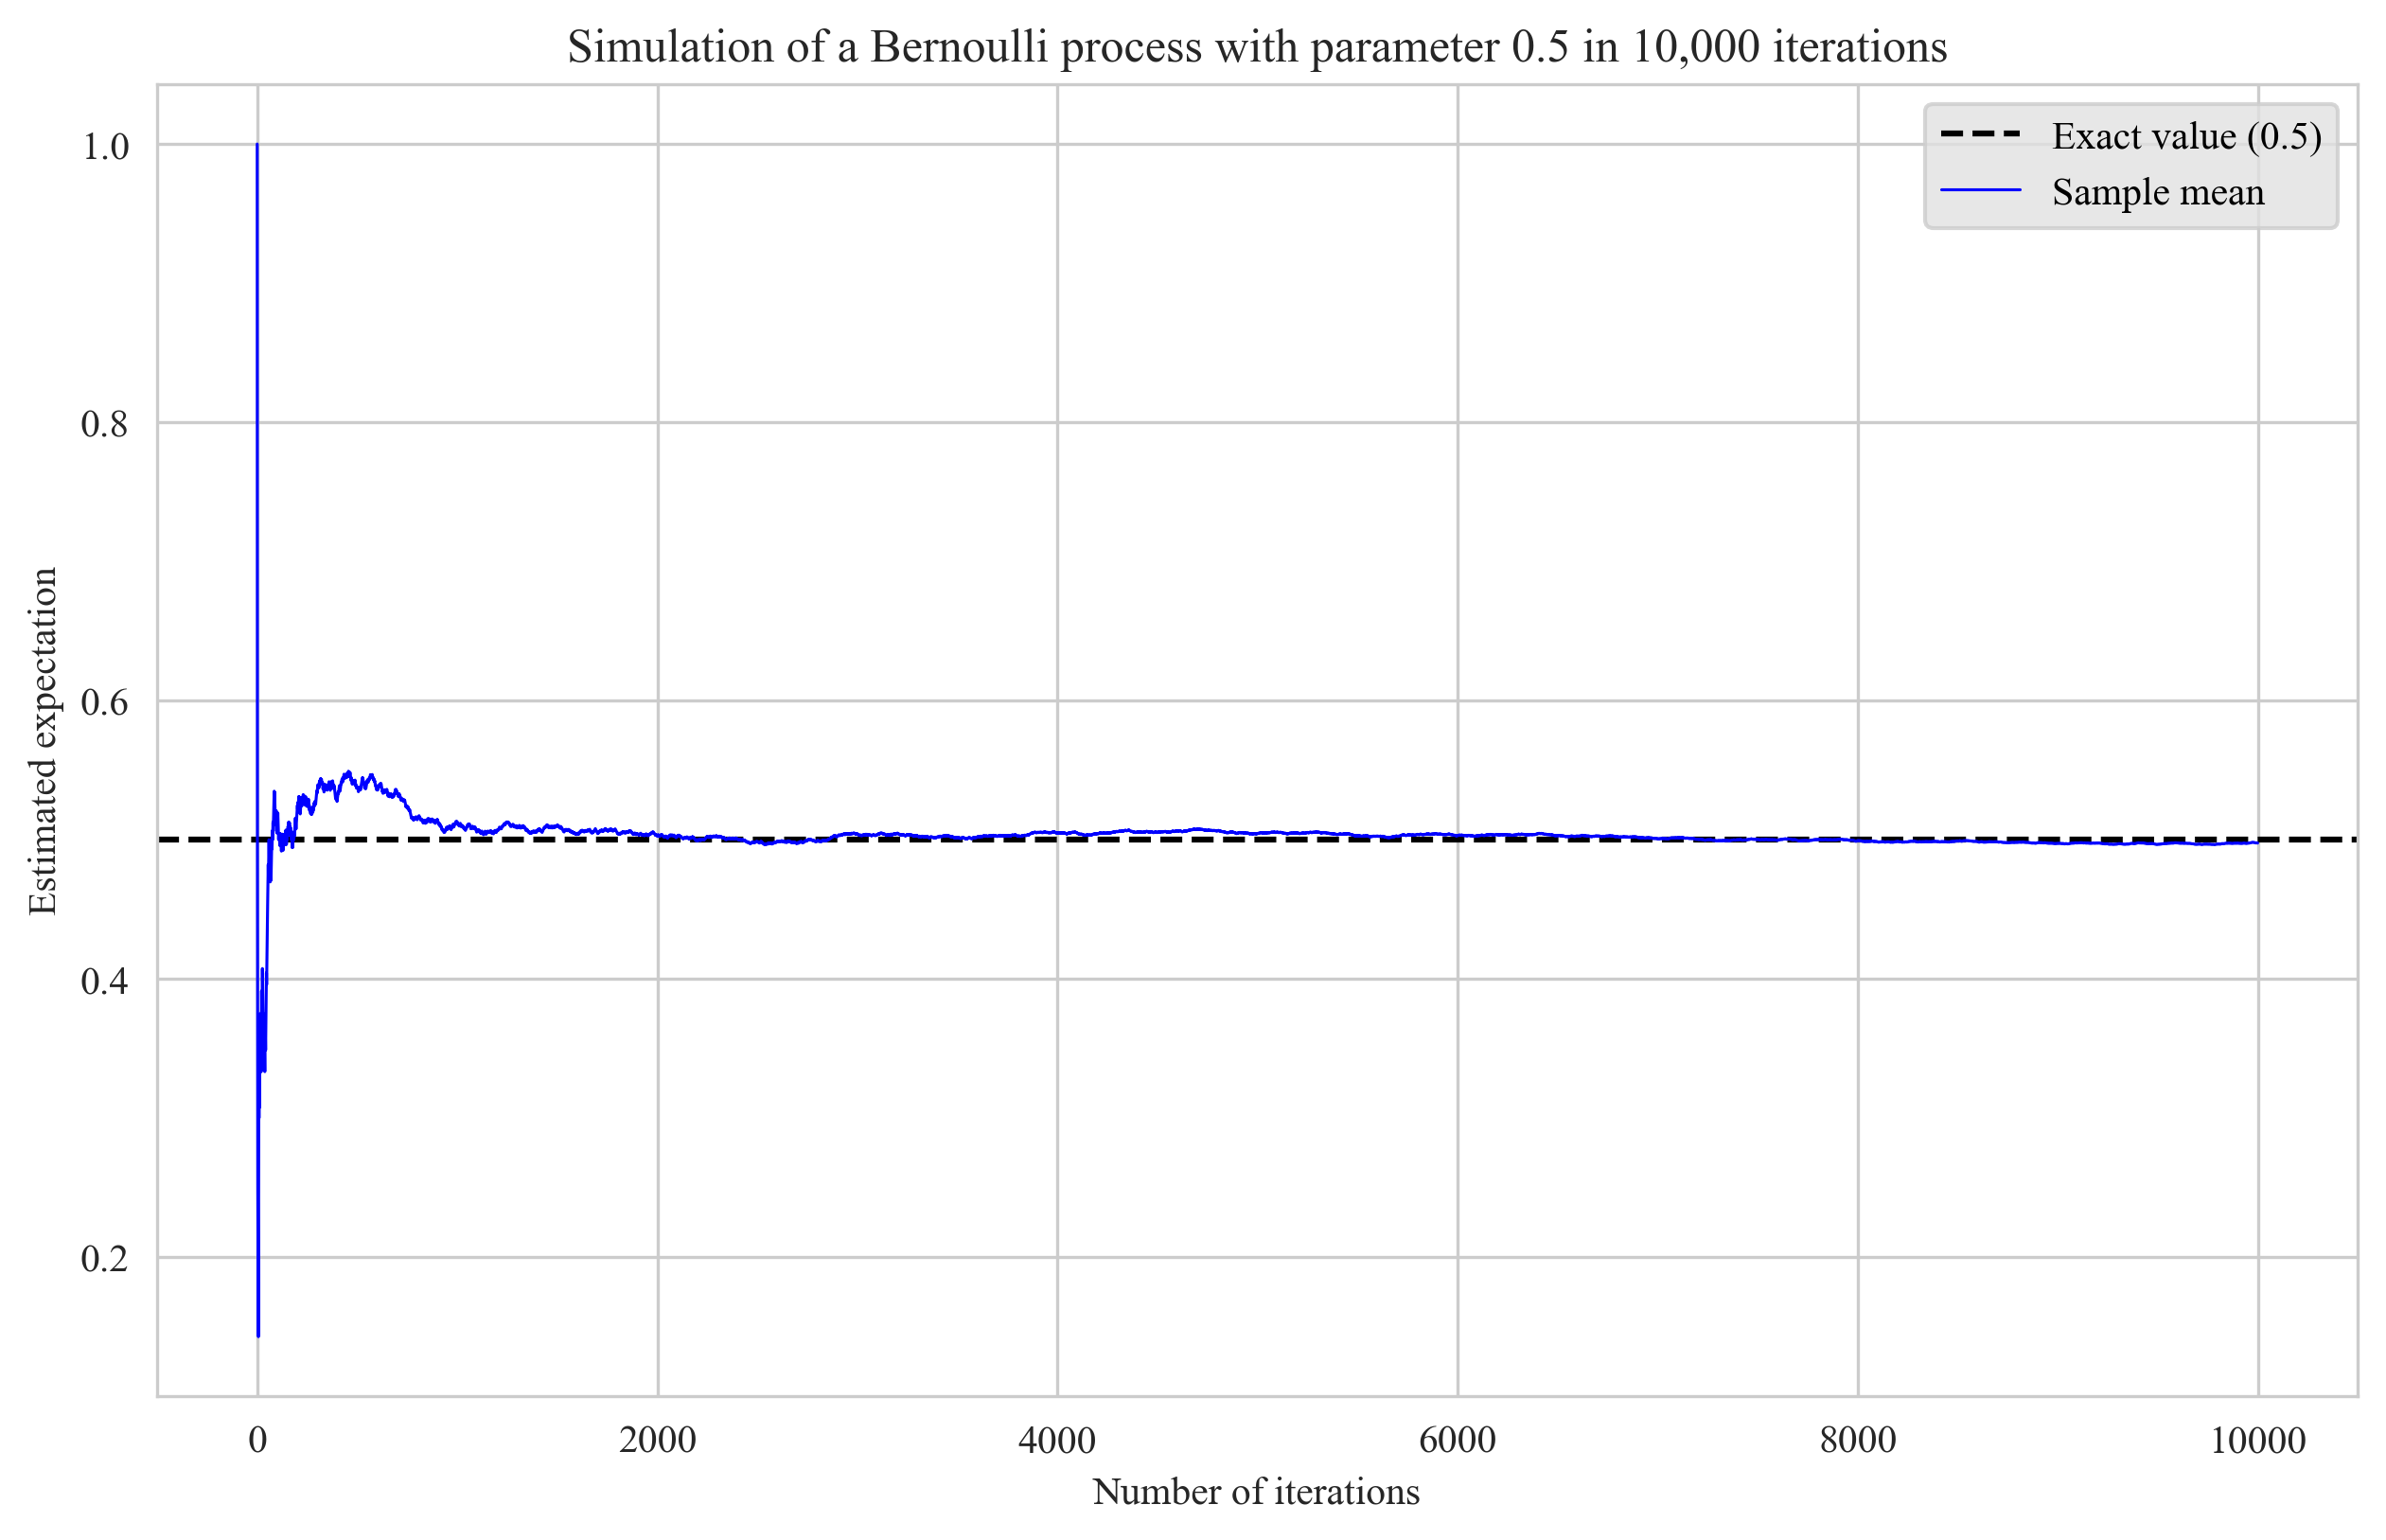

In [7]:
def bernoulli_process(p, N, show_performance_metrics = False, show_visualisations = False):
    assert (0 < p < 1 and type(p) is float) and (N > 1 and type(N) is int)
    start = tm.time()
    tosses = np.random.choice([0, 1], p = [p, 1 - p], size = N)
    path = np.cumsum(tosses) / np.arange(1, N + 1)
    end = tm.time()
    estimate = path[-1]
    if show_performance_metrics:
        computation_time = end - start
        if computation_time == 0.0:
            iterations_per_second = "\u221E"
        else:
            iterations_per_second = f"{int(N / computation_time):,}"
        relative_error = (estimate - p) / estimate
        print(f"Number of simulations: N = {N:,}")
        print(f"Estimate: p \u2248 {estimate}")
        print(f"Exact value: p = {p}")
        print(f"Relative error: {100 * relative_error:.2f}%")
        print(f"Computation time: {computation_time:.3f} seconds")
        print(f"Iterations per second: {iterations_per_second}")
    else:
        pass
    if show_visualisations:
        fig, ax = plt.subplots(figsize = (10, 6), dpi = 300)
        plt.axhline(p, color = "black", linestyle = "--", label = f"Exact value ({p})")
        sns.lineplot(data = path, color = "blue", linewidth = 0.75, label = "Sample mean").set(title = f"Simulation of a Bernoulli process with parameter {p} in {N:,} iterations", xlabel = "Number of iterations", ylabel = "Estimated expectation")
        plt.legend(labelcolor = "black", facecolor = "#E1E1E1")
    else:
        pass
    return estimate

bernoulli_process(1/2, 10000, True, True)